In [1]:
import json

# Đường dẫn đến tập dữ liệu huấn luyện và kiểm tra
train_data_path = "dataset/train.jsonl"
test_data_path = "dataset/public_test.jsonl"

def read_jsonl(file_path):
    data = []
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            data.append(json.loads(line))
    return data

# Đọc dữ liệu từ tập huấn luyện
train_data = read_jsonl(train_data_path)

# Đọc dữ liệu từ tập kiểm tra
test_data = read_jsonl(test_data_path)

# Kiểm tra số lượng mẫu dữ liệu trong tập huấn luyện và tập kiểm tra
print("Số lượng mẫu trong tập huấn luyện:", len(train_data))
print("Số lượng mẫu trong tập kiểm tra:", len(test_data))


Số lượng mẫu trong tập huấn luyện: 7490
Số lượng mẫu trong tập kiểm tra: 1299


In [2]:
# In ra 5 mẫu từ tập huấn luyện
print("Ví dụ từ tập huấn luyện:")
for i, example in enumerate(train_data[:5]):
    print(f"Ví dụ {i + 1}:")
    print("Sentence:", example["sentence"])
    print("Intent:", example["intent"])
    print("Sentence Annotation:", example["sentence_annotation"])
    print("Entities:", example["entities"])
    print()

# In ra 5 mẫu từ tập kiểm tra
print("Ví dụ từ tập kiểm tra:")
for i, example in enumerate(test_data[:5]):
    print(f"Ví dụ {i + 1}:")
    print("Sentence:", example["sentence"])
    print("Intent:", example["intent"])
    print("Sentence Annotation:", example["sentence_annotation"])
    print("Entities:", example["entities"])
    print()


Ví dụ từ tập huấn luyện:
Ví dụ 1:
Sentence: cái đèn tranh trong nhà giữ đồ Trường Sa có còn không ấy nhờ đi kiểm tra ngay nhé
Intent: Kiểm tra tình trạng thiết bị
Sentence Annotation: cái [ device : đèn tranh ] trong [ location : nhà giữ đồ Trường Sa ] có còn không ấy nhờ đi [ command : kiểm tra ] ngay nhé
Entities: [{'type': 'device', 'filler': 'đèn tranh'}, {'type': 'location', 'filler': 'nhà giữ đồ Trường Sa'}, {'type': 'command', 'filler': 'kiểm tra'}]

Ví dụ 2:
Sentence: bật lò nướng lúc 16 giờ 3 phút
Intent: Bật thiết bị
Sentence Annotation: [ command : bật ] [ device : lò nướng ] lúc [ time at : 16 giờ 3 phút ]
Entities: [{'type': 'command', 'filler': 'bật'}, {'type': 'device', 'filler': 'lò nướng'}, {'type': 'time at', 'filler': '16 giờ 3 phút'}]

Ví dụ 3:
Sentence: Bạn ơi chán quá có cái gì nghe không mở radio giúp mình với
Intent: Mở thiết bị
Sentence Annotation: Bạn ơi chán quá có cái gì nghe không [ command : mở ] [ device : radio ] giúp mình với
Entities: [{'type': 'comman

In [3]:
from collections import Counter

# Tính tỷ lệ các nhãn trong tập dữ liệu
def calculate_label_distribution(data):
    label_counts = Counter(example["intent"] for example in data)
    total_samples = len(data)
    label_distribution = {label: count / total_samples for label, count in label_counts.items()}
    return label_distribution

# Tính tỷ lệ các nhãn trong tập huấn luyện
train_label_distribution = calculate_label_distribution(train_data)

# Tính tỷ lệ các nhãn trong tập kiểm tra
test_label_distribution = calculate_label_distribution(test_data)

# In ra tỷ lệ các nhãn
print("Tỷ lệ các nhãn trong tập huấn luyện:")
for label, percentage in train_label_distribution.items():
    print(f"{label}: {percentage * 100:.2f}%")

print("\nTỷ lệ các nhãn trong tập kiểm tra:")
for label, percentage in test_label_distribution.items():
    print(f"{label}: {percentage * 100:.2f}%")


Tỷ lệ các nhãn trong tập huấn luyện:
Kiểm tra tình trạng thiết bị: 15.09%
Bật thiết bị: 13.87%
Mở thiết bị: 14.83%
Đóng thiết bị: 14.69%
Giảm độ sáng của thiết bị: 9.75%
Tăng mức độ của thiết bị: 2.70%
Tăng độ sáng của thiết bị: 7.76%
Tắt thiết bị: 13.43%
Tăng nhiệt độ của thiết bị: 0.84%
Giảm mức độ của thiết bị: 2.22%
Giảm âm lượng của thiết bị: 0.37%
Giảm nhiệt độ của thiết bị: 0.36%
Tăng âm lượng của thiết bị: 0.36%
Hủy hoạt cảnh: 1.91%
Kích hoạt cảnh: 1.83%

Tỷ lệ các nhãn trong tập kiểm tra:
Tăng nhiệt độ của thiết bị: 1.77%
Tăng âm lượng của thiết bị: 0.92%
Giảm nhiệt độ của thiết bị: 1.23%
Đóng thiết bị: 9.55%
Kiểm tra tình trạng thiết bị: 8.62%
Mở thiết bị: 11.16%
Tăng độ sáng của thiết bị: 14.01%
Tắt thiết bị: 14.01%
Bật thiết bị: 11.55%
Tăng mức độ của thiết bị: 2.46%
Giảm độ sáng của thiết bị: 13.24%
Giảm âm lượng của thiết bị: 1.00%
Giảm mức độ của thiết bị: 2.62%
Hủy hoạt cảnh: 3.16%
Kích hoạt cảnh: 4.70%


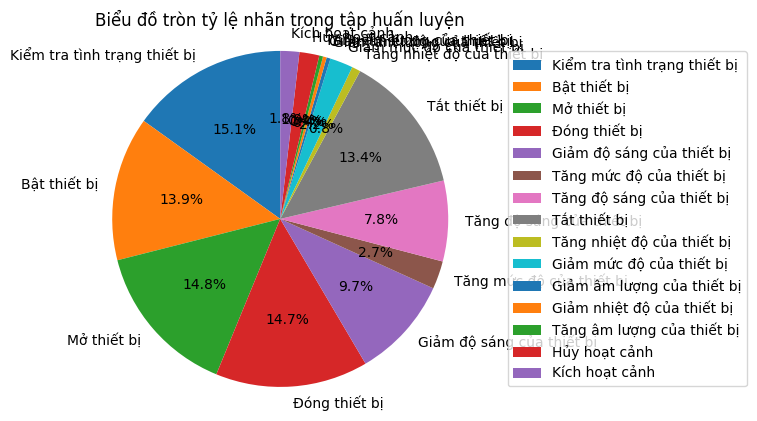

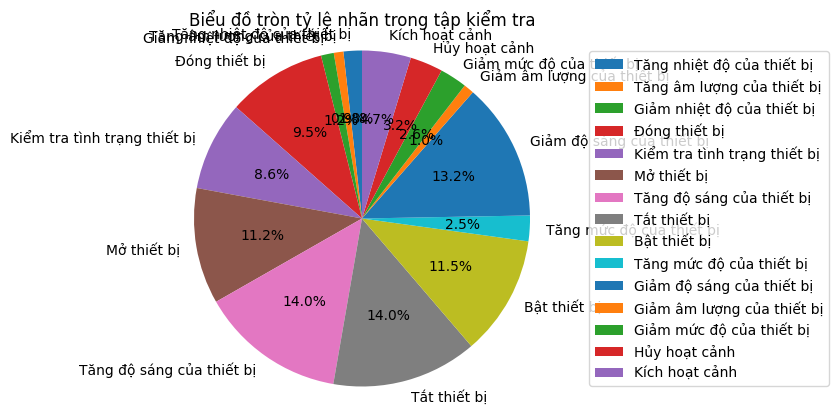

In [4]:
import matplotlib.pyplot as plt

# Hàm để vẽ biểu đồ tròn với chú thích ở góc
def plot_pie_chart_with_corner_legend(label_distribution, title):
    labels = label_distribution.keys()
    sizes = [percentage * 100 for percentage in label_distribution.values()]
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Đảm bảo biểu đồ tròn
    
    plt.title(title)
    
    # Thêm chú thích ở góc
    plt.legend(labels, loc="center", bbox_to_anchor=(1.2, 0.5))  # Đặt vị trí chú thích
    
    plt.show()

# Vẽ biểu đồ tròn với chú thích ở góc cho tập huấn luyện
plot_pie_chart_with_corner_legend(train_label_distribution, "Biểu đồ tròn tỷ lệ nhãn trong tập huấn luyện")

# Vẽ biểu đồ tròn với chú thích ở góc cho tập kiểm tra
plot_pie_chart_with_corner_legend(test_label_distribution, "Biểu đồ tròn tỷ lệ nhãn trong tập kiểm tra")


In [5]:
from Stopword import STOP_WORDS  # Import cấu trúc stop words từ file Stopword.py
import underthesea
# 1. Chuyển về chữ thường
def to_lowercase(text):
    return text.lower()

# 2. Loại bỏ ký tự đặc biệt
def remove_special_characters(text):
    special_chars = "!@#$%^&*()_+[]{}|;':,.<>?~`"
    cleaned_text = ''.join(char for char in text if char not in special_chars)
    return cleaned_text

# 3. Loại bỏ stop words
def remove_stop_words(tokens):
    return [token for token in tokens if token not in STOP_WORDS]

def tokenize(text):
    return underthesea.word_tokenize(text)



In [6]:
for i in range(5):
    print(train_data[i]['sentence'])

cái đèn tranh trong nhà giữ đồ Trường Sa có còn không ấy nhờ đi kiểm tra ngay nhé
bật lò nướng lúc 16 giờ 3 phút
Bạn ơi chán quá có cái gì nghe không mở radio giúp mình với
Alo em, bật giúp anh cái máy chơi game nhá
máy tính ơi, tưới cây đủ rồi, đóng giúp tôi cái vòi tưới với 


In [7]:
len_train = len(train_data)
for i in range(len_train):
    train_data[i]['sentence'] = to_lowercase(train_data[i]['sentence'])
    train_data[i]['sentence'] = remove_special_characters(train_data[i]['sentence'])
    train_data[i]['tokens'] = tokenize(train_data[i]['sentence'])
    train_data[i]['tokens'] = remove_stop_words(train_data[i]['tokens'])

# Tiền xử lý dữ liệu cho tập kiểm tra
len_test = len(test_data)
for i in range(len_test):
    test_data[i]['sentence'] = to_lowercase(test_data[i]['sentence'])
    test_data[i]['sentence'] = remove_special_characters(test_data[i]['sentence'])
    test_data[i]['tokens'] = tokenize(test_data[i]['sentence'])
    test_data[i]['tokens'] = remove_stop_words(test_data[i]['tokens'])

In [8]:
train_data

[{'id': '64831a87d9f56915da41ef35',
  'sentence': 'cái đèn tranh trong nhà giữ đồ trường sa có còn không ấy nhờ đi kiểm tra ngay nhé',
  'intent': 'Kiểm tra tình trạng thiết bị',
  'sentence_annotation': 'cái [ device : đèn tranh ] trong [ location : nhà giữ đồ Trường Sa ] có còn không ấy nhờ đi [ command : kiểm tra ] ngay nhé',
  'entities': [{'type': 'device', 'filler': 'đèn tranh'},
   {'type': 'location', 'filler': 'nhà giữ đồ Trường Sa'},
   {'type': 'command', 'filler': 'kiểm tra'}],
  'file': '64831a87d9f56915da41ef35.wav',
  'tokens': ['đèn tranh', 'đồ', 'trường sa', 'đi', 'kiểm tra']},
 {'id': '64830027271e6f39323a3048',
  'sentence': 'bật lò nướng lúc 16 giờ 3 phút',
  'intent': 'Bật thiết bị',
  'sentence_annotation': '[ command : bật ] [ device : lò nướng ] lúc [ time at : 16 giờ 3 phút ]',
  'entities': [{'type': 'command', 'filler': 'bật'},
   {'type': 'device', 'filler': 'lò nướng'},
   {'type': 'time at', 'filler': '16 giờ 3 phút'}],
  'file': '64830027271e6f39323a3048.

In [9]:
X = []
y = []
X_test = []
y_test = []
for i in range (len_train):
    X.append(train_data[i]['tokens'])
    y.append(train_data[i]['intent'])

for i in range (len_test):
    X_test.append(test_data[i]['tokens'])
    y_test.append(test_data[i]['intent'])

In [10]:
X_test

[['tăng', 'hộ', 'máy lạnh', 'nóng'],
 ['ơn', 'tăng', 'nhiệt độ', 'máy lạnh'],
 ['tăng', 'bếp', '8'],
 ['tăng', 'giúp', 'máy lạnh'],
 ['tăng', 'giúp', 'máy lạnh'],
 ['tăng', 'máy lạnh', 'nhá'],
 ['máy lạnh', 'bao nhiêu', 'độ', 'nóng thế', 'tăng', 'giúp'],
 ['tăng', 'máy lạnh', 'đi', 'nổi', 'da gà'],
 ['ninh', 'sườn', 'tăng', 'giúp', 'bếp', '8'],
 ['ờm', 'tăng', 'âm thanh', 'radio', '31', 'giúp', 'hộ'],
 ['trợ lý', 'ảo', 'tăng', 'giúp', 'radio', 'phòng', 'thay', 'đồ', '2', 'giúp'],
 ['tăng', 'radio', 'phòng', 'thay', 'đồ', '2', 'giúp'],
 ['giảm', 'máy lạnh', 'phòng', 'giặt'],
 ['giảm', 'máy lạnh', 'một chút'],
 ['giảm', 'máy lạnh', 'phòng', 'giặt'],
 ['trời', 'ấm', 'giảm', 'đèn', 'sưởi', 'đi'],
 ['giảm', 'hộ', 'máy lạnh', 'phòng', 'giặt'],
 ['đóng', 'hộ', 'lò', 'sưởi', '18'],
 ['kiểm tra', 'giúp', '5', '29', 'phút'],
 ['mở', 'hòa', '11'],
 ['đóng', '15', '38', 'phút', 'nhá'],
 ['thông minh', 'tăng', 'đèn', 'rủ'],
 ['cháu', 'tắt', 'giúp', 'đèn', 'hắt trần'],
 ['bật', 'đèn', 'bếp'],
 ['mở'

In [11]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo và fit LabelEncoder trên tập huấn luyện
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Sử dụng LabelEncoder đã fit để transform tập kiểm tra
y_test = label_encoder.transform(y_test)



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Vector hóa tập X bằng TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Số lượng đặc trưng tối đa là 1000 (có thể thay đổi)
X_tfidf = tfidf_vectorizer.fit_transform([' '.join(tokens) for tokens in X])

# Sử dụng vectorizer đã fit để transform tập kiểm tra
X_test_tfidf = tfidf_vectorizer.transform([' '.join(tokens) for tokens in X_test])

X_test = X_test_tfidf
# Chia tập X thành tập huấn luyện và tập validation
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Xem kích thước của các tập dữ liệu
print(f"Số lượng mẫu trong tập train: {X_train.shape[0]}")
print(f"Số lượng mẫu trong tập validation: {X_val.shape[0]}")
print(f"Số lượng mẫu trong tập test: {X_test.shape[0]}")



Số lượng mẫu trong tập train: 5992
Số lượng mẫu trong tập validation: 1498
Số lượng mẫu trong tập test: 1299


In [13]:
print(X_train[1])

  (0, 619)	0.42795080257361057
  (0, 633)	0.4566464193556111
  (0, 374)	0.30674110340104227
  (0, 145)	0.3865090771553872
  (0, 564)	0.44361350283537376
  (0, 581)	0.19280939991331564
  (0, 258)	0.1967778269247286
  (0, 574)	0.25840105907610794
  (0, 652)	0.1593479272956771


In [14]:
y_val

array([13,  8,  2, ...,  8, 13,  8], dtype=int64)

In [15]:
class_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))


In [16]:
class_mapping

{0: 'Bật thiết bị',
 1: 'Giảm mức độ của thiết bị',
 2: 'Giảm nhiệt độ của thiết bị',
 3: 'Giảm âm lượng của thiết bị',
 4: 'Giảm độ sáng của thiết bị',
 5: 'Hủy hoạt cảnh',
 6: 'Kiểm tra tình trạng thiết bị',
 7: 'Kích hoạt cảnh',
 8: 'Mở thiết bị',
 9: 'Tăng mức độ của thiết bị',
 10: 'Tăng nhiệt độ của thiết bị',
 11: 'Tăng âm lượng của thiết bị',
 12: 'Tăng độ sáng của thiết bị',
 13: 'Tắt thiết bị',
 14: 'Đóng thiết bị'}

In [17]:
encoded_label = 1  # Ví dụ: 1 tương ứng với 'Đóng thiết bị'
original_label = class_mapping[encoded_label]
print(original_label)  # Kết quả: 'Đóng thiết bị'


Giảm mức độ của thiết bị


In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Khởi tạo mô hình Naive Bayes
naive_bayes_model = MultinomialNB()

# Huấn luyện mô hình trên tập huấn luyện
naive_bayes_model.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred = naive_bayes_model.predict(X_val)

# Đánh giá mô hình bằng độ chính xác
accuracy = accuracy_score(y_val, y_pred)
print(f"Độ chính xác trên tập validation: {accuracy:.2%}")


Độ chính xác trên tập validation: 93.79%


In [19]:
y_test_predic = naive_bayes_model.predict(X_test)

In [20]:
print(confusion_matrix(y_pred, y_val))

[[216   0   0   0   0   0   0   3   0   1   1   0   0   0   0]
 [  0  18   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   2   1   1 144   0   0   1   0   0   0   2   0   0   0]
 [  0   0   0   0   0  18   0   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 226   0   0   0   0   0   0   2   0]
 [  0   0   0   0   0   1   0   7   0   0   0   0   0   0   0]
 [  2   6   3   0   0   0   0   3 214   2   5   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0  29   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   8   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1 122   0   0]
 [  2   1   1   0   1   3   0  11   0   0   0   0   1 188   0]
 [  3   6   0   0   0   3   0   3   7   3   0   0   0   1 215]]


In [21]:
accuracy_test = accuracy_score(y_test, y_test_predic)
print(f"Độ chính xác trên tập validation: {accuracy_test:.2%}")

Độ chính xác trên tập validation: 82.68%


In [22]:
i = 910
print(y_test_predic[i])
print(y_test[i])

12
12


In [23]:
print(confusion_matrix(y_test_predic, y_test))

[[131   0   3   0   0   1   0   4   0   2   1   3   1  10   0]
 [  0  20   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3  11   7   7 169   3   0   7   0   0   1   1   5   0   0]
 [  0   0   0   0   0  23   0   9   0   0   0   0   0   0   0]
 [  5   0   1   0   1   1 112   6   2   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   4   0   0   0   0   0   0   0]
 [  3   2   3   6   0   0   0   9 139   7   7   3   0   1   0]
 [  0   0   0   0   0   0   0   0   0  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   4   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   3   0  11  10   5 173   1   0]
 [  7   0   2   0   2   1   0  11   1   2   0   0   2 165   0]
 [  0   1   0   0   0  12   0   8   3   0   0   0   0   5 124]]


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Định nghĩa các giá trị mà chúng ta muốn tối ưu hóa
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],  # Tìm kiếm trên các giá trị alpha khác nhau
}

# Tạo mô hình Naive Bayes
nb = MultinomialNB()

# Tạo đối tượng Grid Search
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy')

# Huấn luyện mô hình trên dữ liệu train đã vector hóa và nhãn đã được mã hóa
grid_search.fit(X_train, y_train)

# Lấy ra giá trị tốt nhất của siêu tham số
best_alpha = grid_search.best_params_['alpha']

# In ra giá trị tốt nhất
print("Best alpha:", best_alpha)

# Sử dụng giá trị tốt nhất để xây dựng mô hình Naive Bayes
best_nb = MultinomialNB(alpha=best_alpha)
best_nb.fit(X_train, y_train)

# Đánh giá mô hình trên tập validation
accuracy = best_nb.score(X_val, y_val)
print("Accuracy on validation set:", accuracy)


Best alpha: 0.1
Accuracy on validation set: 0.9559412550066756


In [25]:
y_pred_after_nb = best_nb.predict(X_test)

print(confusion_matrix(y_pred_after_nb, y_test))
print(accuracy_score(y_pred_after_nb, y_test))

[[127   0   1   1   0   0   1   4   0   0   0   0   0  11   0]
 [  0  27   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   6   0   3   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   8   0   0   0   0   5   0   0   0   0   0   0]
 [  3   7   5   1 160   2   0   4   0   0   0   0   4   0   2]
 [  0   0   0   0   0  26   0  15   0   0   0   0   0   0   0]
 [  6   0   1   0   2   1 111   6   4   0   0   0   0   1   0]
 [  2   0   0   0   0   0   0  15   1   0   0   0   1   0   0]
 [  3   0   3   3   0   0   0   4 129   0   1   1   0   1   0]
 [  0   0   0   0   0   0   0   0   2  23   0   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0  15   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11   1   0   0]
 [  1   0   0   0   2   0   0   1   0   8   6   0 175   1   0]
 [  8   0   0   0   5   1   0   8   1   0   0   0   1 164   0]
 [  0   0   0   0   0  11   0   4   3   0   0   0   0   3 122]]
0.8614318706697459


In [26]:

intent_predict_test = []

for i in range(len_test):
    intent_predict_test.append(class_mapping[y_pred_after_nb[i]])

In [27]:
intent_predict_test

['Tăng nhiệt độ của thiết bị',
 'Tăng nhiệt độ của thiết bị',
 'Tăng độ sáng của thiết bị',
 'Tăng nhiệt độ của thiết bị',
 'Tăng nhiệt độ của thiết bị',
 'Tăng nhiệt độ của thiết bị',
 'Tăng nhiệt độ của thiết bị',
 'Giảm nhiệt độ của thiết bị',
 'Tăng độ sáng của thiết bị',
 'Tăng âm lượng của thiết bị',
 'Tăng âm lượng của thiết bị',
 'Tăng âm lượng của thiết bị',
 'Mở thiết bị',
 'Giảm nhiệt độ của thiết bị',
 'Mở thiết bị',
 'Giảm độ sáng của thiết bị',
 'Mở thiết bị',
 'Đóng thiết bị',
 'Kiểm tra tình trạng thiết bị',
 'Mở thiết bị',
 'Đóng thiết bị',
 'Tăng độ sáng của thiết bị',
 'Tắt thiết bị',
 'Bật thiết bị',
 'Mở thiết bị',
 'Tăng độ sáng của thiết bị',
 'Tăng độ sáng của thiết bị',
 'Tăng độ sáng của thiết bị',
 'Tăng mức độ của thiết bị',
 'Mở thiết bị',
 'Bật thiết bị',
 'Tăng độ sáng của thiết bị',
 'Tắt thiết bị',
 'Tăng nhiệt độ của thiết bị',
 'Đóng thiết bị',
 'Bật thiết bị',
 'Tăng độ sáng của thiết bị',
 'Tăng độ sáng của thiết bị',
 'Tăng độ sáng của thiết bị',
 